# EDA

In [1]:
# !pip install seaborn

import os
os.getcwd()

'E:\\Internship\\Task 1. Bank Customer Churn Prediction\\project Bank Customer Churn Prediction'

### 1. Loading data

In [2]:
# importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring output warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [3]:
path = "/Internship/Task 1. Bank Customer Churn Prediction/project Bank Customer Churn Prediction/data/Churn_Modelling.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df_column = df.columns.tolist()
print(df_column)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [9]:
cat_cols = df.dtypes[df.dtypes==object].index.tolist()
num_cols = df.dtypes[df.dtypes!=object].index.tolist()

print(cat_cols)
print(num_cols)

['Surname', 'Geography', 'Gender']
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [10]:
# Check statistical values for columns with numerical datatype
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# Check statistical values for columns without numerical datatype
df.describe(exclude=np.number)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#### Key Findings:

- Flawless Data: The dataset is complete, with no missing values to impede our analysis.
- Streamlining for Success: To build an effective churn model, we'll exclude irrelevant fields like RowNumber, CustomerID, and Surname that hold no predictive value.
- Focus on "Exited": Our target variable, "Exited," serves as the key indicator of customer churn, guiding our efforts to understand and predict attrition.

In [12]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, hue=None ,height: int = 8):
    _ = sns.displot(data, x=column, hue=hue ,kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')
 
def get_unique_values(data, column):
    """this methods returns the number of counts in percentage"""
    num_unique_values = len(data[column].unique())
    
    percent_count = data[column].value_counts(normalize=True)*100
    
    print(f"unique values :- {data[column].unique()}")
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print("{}".format(percent_count))

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, hue:str=None, height: int = 8, aspect: int = 2):
    
    if hue:
        turnover = data.groupby(column)[hue].value_counts(normalize=True).mul(100)
        
        _ = sns.countplot(data = df, x=column, hue=hue)
        
        #Distribution of Customer Churn in different Geographies
        return turnover
    else: 
        _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}')
          
def correlation_plot(data: pd.DataFrame = None):
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')

### 4.1 Categorical Variables

### 4.0.1 Exited 

- The variable "Exited" represents whether a customer is an existing customer (0) or a churned customer (1), offering valuable insights into customer retention.
- Data Imbalance: The dataset is skewed, with approximately 80% of the data representing existing customers and 20% representing churned customers. This imbalance requires careful handling during model development to ensure accurate predictions and unbiased results.

In [13]:
get_unique_values(data = df, column='Exited')

unique values :- [1 0]
Column: Exited has 2 unique values

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


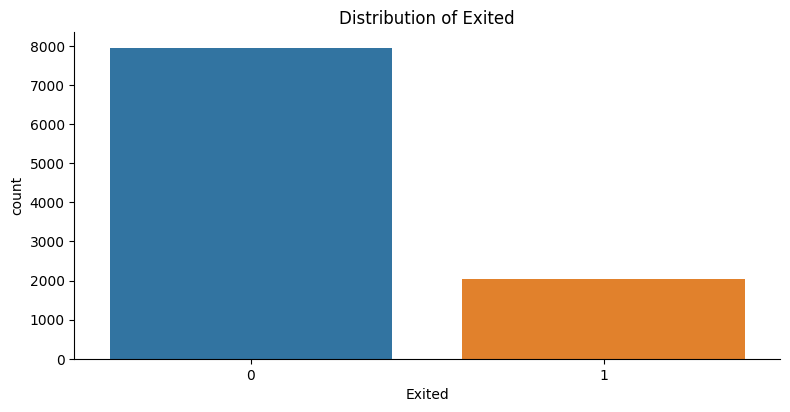

In [14]:
plot_categorical_distribution(data = df, column='Exited',height=4)

### 4.0.2 Geography
- Customer Churn Data Snapshot: The dataset includes information on customer churn from three nations: France, Germany, and Spain, providing a variety of viewpoints on consumer behavior.
- Customer Distribution: France accounts for 50% of all customers, followed by Germany and Spain, each with 25%.
- turnover analysis: Surprisingly, Germany has the greatest rate of customer turnover, with almost 32% of its customers doing so. Comparatively, the churn rate for the respective customer bases in France and Spain is roughly 16%.

In [15]:
get_unique_values(data = df, column='Geography')

unique values :- ['France' 'Spain' 'Germany']
Column: Geography has 3 unique values

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: proportion, dtype: float64

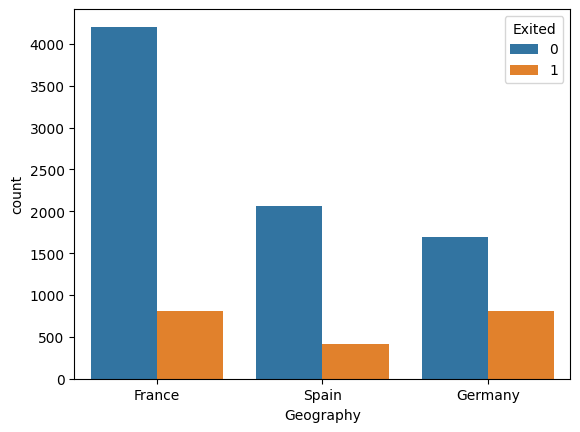

In [16]:
plot_categorical_distribution(data = df, column='Geography', hue='Exited',height=4)

### 4.0.3 Gender
- Customer Gender Distribution: There are male and female clients, with males making up 54% and females 45% of the entire customer population, respectively.
- Rates of Churn by Gender: It's interesting to note that 25% of female clients have left, suggesting a greater attrition rate for this demographic. Contrarily, the churn rate for male clients is 16%, indicating somewhat lower client attrition in this market.

In [17]:
get_unique_values(df, 'Gender')

unique values :- ['Female' 'Male']
Column: Gender has 2 unique values

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: proportion, dtype: float64

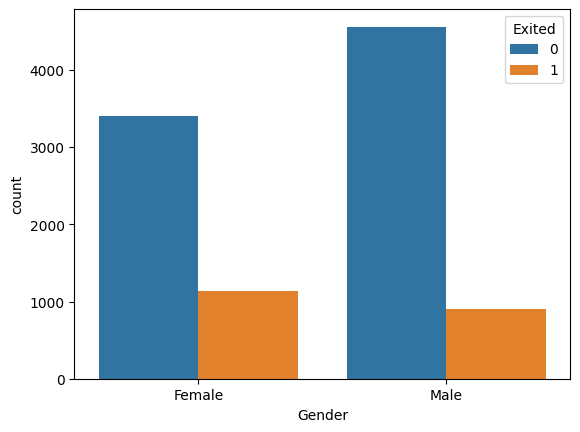

In [18]:
plot_categorical_distribution(data = df, column = 'Gender', hue="Exited", height=4)

### 4.0.4 NumOfProducts
- Product selection: Customers often have between 1 and 4 different goods. This demonstrates the range of involvement with the bank's products.
- Dominant Product Distribution: The vast majority of customers (about 96.7%) own either one (50.8%) or two (45.9%) products. This implies that the preferences of the customers are concentrated inside this range.
- Churned Clientele: Notably, all users of 4 card goods have abandoned their accounts, suggesting that attrition within this group is highly likely.
- Churn Rates by Product: A considerable share (82%) of customers with three card products have churned, underlining the value of examining product-specific churn trends.

In [19]:
get_unique_values(data = df, column='NumOfProducts')

unique values :- [1 3 2 4]
Column: NumOfProducts has 4 unique values

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64


NumOfProducts  Exited
1              0          72.285602
               1          27.714398
2              0          92.418301
               1           7.581699
3              1          82.706767
               0          17.293233
4              1         100.000000
Name: proportion, dtype: float64

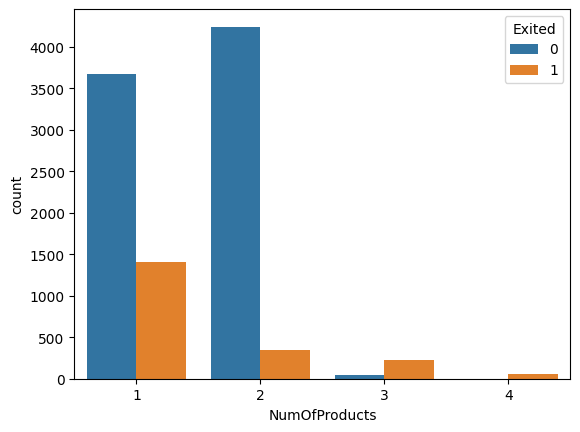

In [20]:
plot_categorical_distribution(data=df, column = 'NumOfProducts', hue='Exited', height=4)

### 4.0.5 Tenure
- Tenure insights: A customer's tenure can last anywhere between 0 and 10 years, with an average tenure of 5 years. This suggests that the bank has a wide variety of customer ties.
- Concentrated Tenure Range: Most customers, about 90%, have a tenure of between one and nine years. This implies a concentration of client loyalty during this time period, showing the value of building long-term client connections.

In [21]:
get_unique_values(data=df, column='Tenure')

unique values :- [ 2  1  8  7  4  6  3 10  5  9  0]
Column: Tenure has 11 unique values

Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64


Tenure  Exited
0       0         76.997579
        1         23.002421
1       0         77.584541
        1         22.415459
2       0         80.820611
        1         19.179389
3       0         78.889990
        1         21.110010
4       0         79.474216
        1         20.525784
5       0         79.347826
        1         20.652174
6       0         79.731127
        1         20.268873
7       0         82.782101
        1         17.217899
8       0         80.780488
        1         19.219512
9       0         78.353659
        1         21.646341
10      0         79.387755
        1         20.612245
Name: proportion, dtype: float64

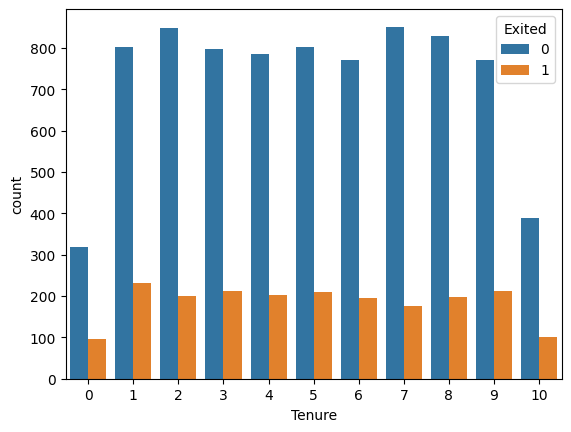

In [22]:
plot_categorical_distribution(data=df, column='Tenure', hue='Exited', height=4)

### 4.0.6 Has Credit Card
- Usage of Credit Cards: A large percentage of the customer base uses credit cards, with over 70% of consumers having one.

In [23]:
get_unique_values(df, 'HasCrCard')

unique values :- [1 0]
Column: HasCrCard has 2 unique values

HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64


HasCrCard  Exited
0          0         79.185059
           1         20.814941
1          0         79.815734
           1         20.184266
Name: proportion, dtype: float64

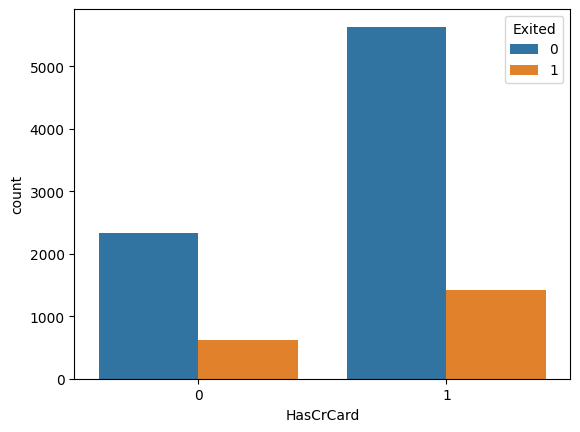

In [24]:
plot_categorical_distribution(data=df, column='HasCrCard', hue='Exited', height=4)

### 4.0.7 Is Active Member
- Active Membership : About 51% of clients are active members, which indicates that a sizeable chunk of the customer population participates in the bank's membership program.
- Churn Comparison: 14% of current members have left, compared to about 27% of inactive members. This implies that non-active members are more likely to leave than active members, highlighting the need of encouraging active participation to increase customer retention.

In [25]:
get_unique_values(df, 'IsActiveMember')

unique values :- [1 0]
Column: IsActiveMember has 2 unique values

IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64


IsActiveMember  Exited
0               0         73.149103
                1         26.850897
1               0         85.730926
                1         14.269074
Name: proportion, dtype: float64

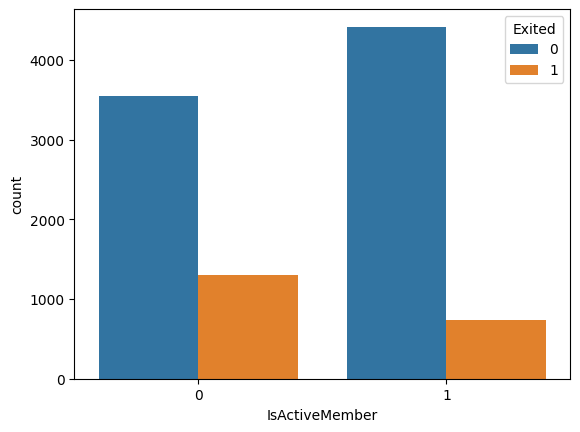

In [26]:
plot_categorical_distribution(data=df, column='IsActiveMember', hue='Exited', height=4)

## Neumerical Variables

### 4.1.1 CreditScore
- Credit Score Range: The credit scores of customers range from 350 to 850, reflecting the variation in their creditworthiness.
- Churned Customers: Notably, all customers with credit scores below 400 have churned. This highlights the significance of credit score as a potential factor contributing to customer attrition, emphasizing the need to address credit-related issues to improve customer retention.

In [27]:
df['CreditScore'].describe(include='all')

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

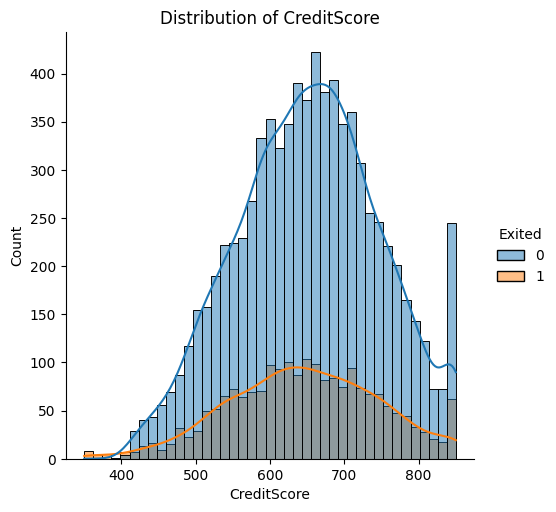

In [28]:
plot_continuous_distribution(data=df, column='CreditScore', hue='Exited', height=5)

### 4.1.2 Age
- Age range : The age of the custumor rages from 18 to 92, with an average age of around 39. This indicates a diverse customer base in terms of age.
- High Churn Rate: Of note, over 56% of customers between the ages of 50 and 60 have left the company. This age group has a much higher percentage of client churn, indicating the necessity for focused retention efforts for this market.
- Age Distribution: There are comparatively less consumers in older age groups, as seen by the right-skewed (positively skewed) age distribution of the client base. This skewness highlights the need of taking into account age as a possible variable in churn prediction and putting in place the necessary safeguards to keep clients of all ages.

In [29]:
df['Age'].describe(include='all')

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

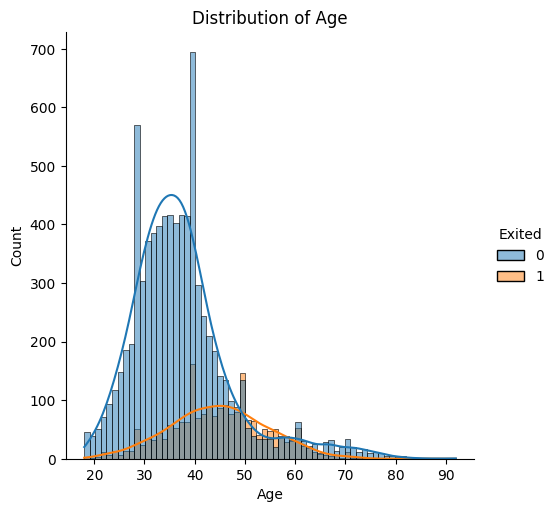

In [30]:
plot_continuous_distribution(data=df, column='Age', hue='Exited', height=5)

### 4.1.3 Balance
- Zero Balance Accounts: Approximately 36.17% of customers have zero balance in their bank accounts, indicating a significant portion of customers with no funds in their accounts. Out of these customers, 13% have churned.
- Balance Distribution: Excluding the customers with zero balance, the distribution of account balances follows a normal distribution pattern. This suggests that the remaining customers, who maintain a positive balance, have a more typical distribution of account balances, enabling the bank to better understand and manage their financial status.

In [31]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [32]:
df['Balance'].value_counts(normalize=True)*100

Balance
0.00         36.17
130170.82     0.02
105473.74     0.02
85304.27      0.01
159397.75     0.01
             ...  
81556.89      0.01
112687.69     0.01
108698.96     0.01
238387.56     0.01
130142.79     0.01
Name: proportion, Length: 6382, dtype: float64

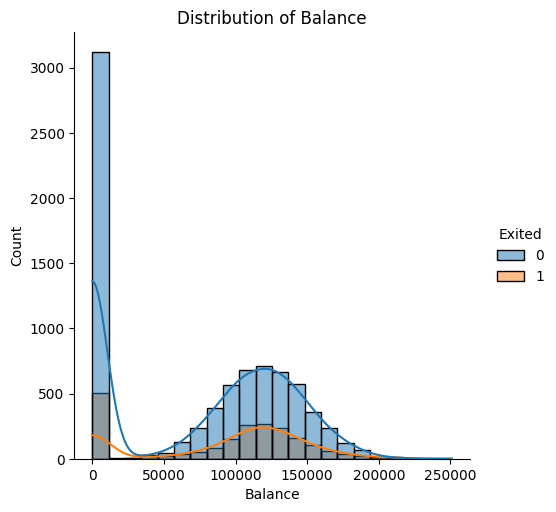

In [33]:
plot_continuous_distribution(data=df, column='Balance', hue='Exited', height=5)

### 4.1.4 EstimatedSalary
- Estimated Salary Range: Customers' estimated salaries range from $12 to $200k, showing a large variety in their respective earning levels.
- Almost evenly distributed wages over this range indicate a somewhat balanced representation of consumers at all income levels, which is referred to as a balanced salary distribution. Like customer churn, the distribution of which is likewise uniform, shows that churn is not significantly connected with pay alone.

In [34]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

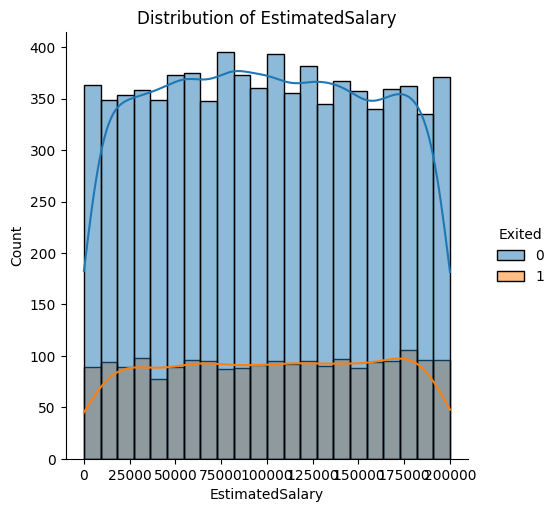

In [35]:
plot_continuous_distribution(data=df, column='EstimatedSalary', hue='Exited', height=5)

## 4.2.1 Ouliers

In [36]:
from scipy import stats

In [37]:
def get_iqr_range(data:pd.DataFrame=None, column:str=None, per_1 = 0.25, per_2=0.75):
    """This funcition will get the upper and lower limit to detect the ouliers
    This method is known as Inter Quantile Range (IQR)"""
    
    Q1 = data[column].quantile(per_1)
    Q3 = data[column].quantile(per_2)
    
    IQR =  Q3 - Q1
    
    upper_tail = Q3 + 1.5 * IQR
    lower_tail = Q1 - 1.5 * IQR
    print(f"for Normal Outliers :- \nIQR :- {IQR}\nupper tail = {upper_tail}\nLower_tail = {lower_tail}")
    return upper_tail, lower_tail

In [38]:
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

CreditScore           AxesSubplot(0.125,0.653529;0.227941x0.226471)
Age                AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Tenure             AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Balance               AxesSubplot(0.125,0.381765;0.227941x0.226471)
NumOfProducts      AxesSubplot(0.398529,0.381765;0.227941x0.226471)
EstimatedSalary    AxesSubplot(0.672059,0.381765;0.227941x0.226471)
dtype: object

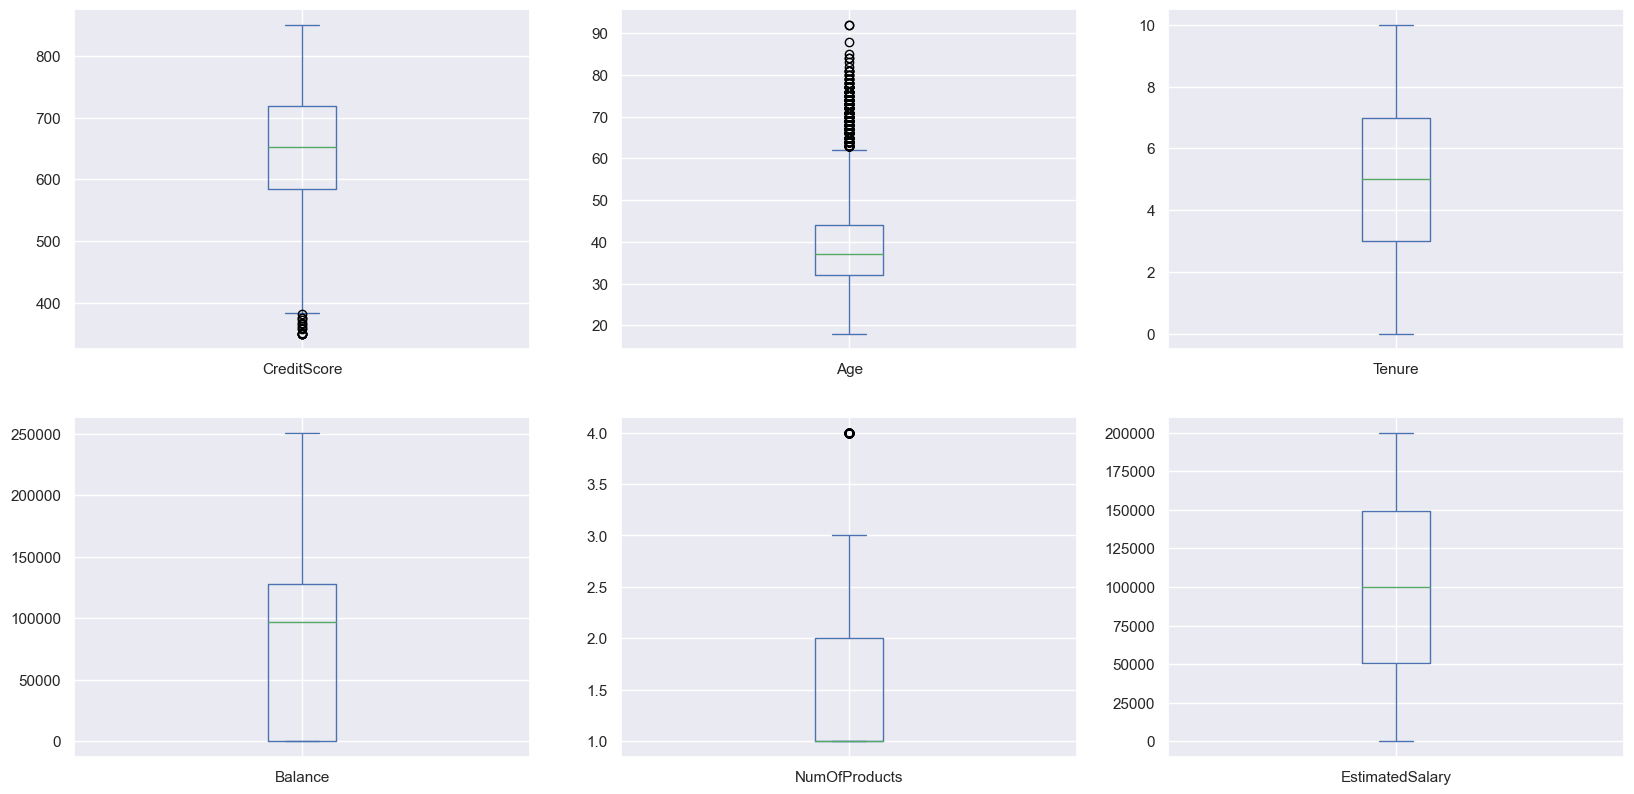

In [39]:
sns.set_theme(color_codes=True)
df[continuous_columns].plot(kind="box", subplots=True, layout=(3,3), grid=True, figsize=(20,15))

### 1. credit Score

In [40]:
df[continuous_columns].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [41]:
cs_upper, cs_lower = get_iqr_range(df, 'CreditScore')

for Normal Outliers :- 
IQR :- 134.0
upper tail = 919.0
Lower_tail = 383.0


In [42]:
# recoreds which are bellow than lower limit of CreditScore outliers
# recoreds which are greater than upper limit of CreditScore outliers 
df[(df['CreditScore'] > cs_upper)|(df['CreditScore'] < cs_lower)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


### 2. Age

In [43]:
age_upper, age_lower = get_iqr_range(df, 'Age')

for Normal Outliers :- 
IQR :- 12.0
upper tail = 62.0
Lower_tail = 14.0


In [44]:
# recoreds which are greater than upper limit of Age outliers
# recoreds which are bellow than lower limit of Age outliers
df[(df['Age'] > age_upper) | (df['Age'] < age_lower)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


### 3. NumberOfProducts

In [45]:
nop_upper, nop_lower = get_iqr_range(df, 'NumOfProducts')

for Normal Outliers :- 
IQR :- 1.0
upper tail = 3.5
Lower_tail = -0.5


In [46]:
# recoreds which are greatter than upper limit of NumOfProducts outliers
# recoreds which are bellow than lower limit of NumOfProducts outliers
df[(df['Age'] > age_upper) | (df['Age'] < age_lower)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


## 4.2.1 Handling Outliers

### 1. credit Score

In [47]:
df1 = df[(df['CreditScore']>cs_lower) & (df['CreditScore']<cs_upper)]

In [48]:
df2 = df1[(df1['Age']>age_lower) & (df1['Age']<age_upper)]

In [49]:
df3 = df2[(df2['NumOfProducts']>nop_lower) & (df2['NumOfProducts']<nop_upper)]

In [50]:
df3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [51]:
# sns.set_theme(color_codes=True)
# df3[continuous_columns].plot(kind="box", subplots=True, layout=(3,3), grid=True, figsize=(20,15))

## 5. 0. 0 Data Transformation

### Drop columns
The columns "RowNumber," "CustomerId," and "Surname" are being removed from the dataset since they uniquely identify each customer and offer no useful data for developing the customer churn model. By removing these columns, we can concentrate on the important characteristics that help predict churn and increase the effectiveness of our study.

In [52]:
print(f"Original size of the data \n{df3.shape}")
df3.drop(columns=['RowNumber','CustomerId', 'Surname'],axis='columns', inplace=True)
print(f"size of the data now \n{df3.shape}")

Original size of the data 
(9515, 14)
size of the data now 
(9515, 11)


In [53]:
num_cols = num_cols[2:]
print(num_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


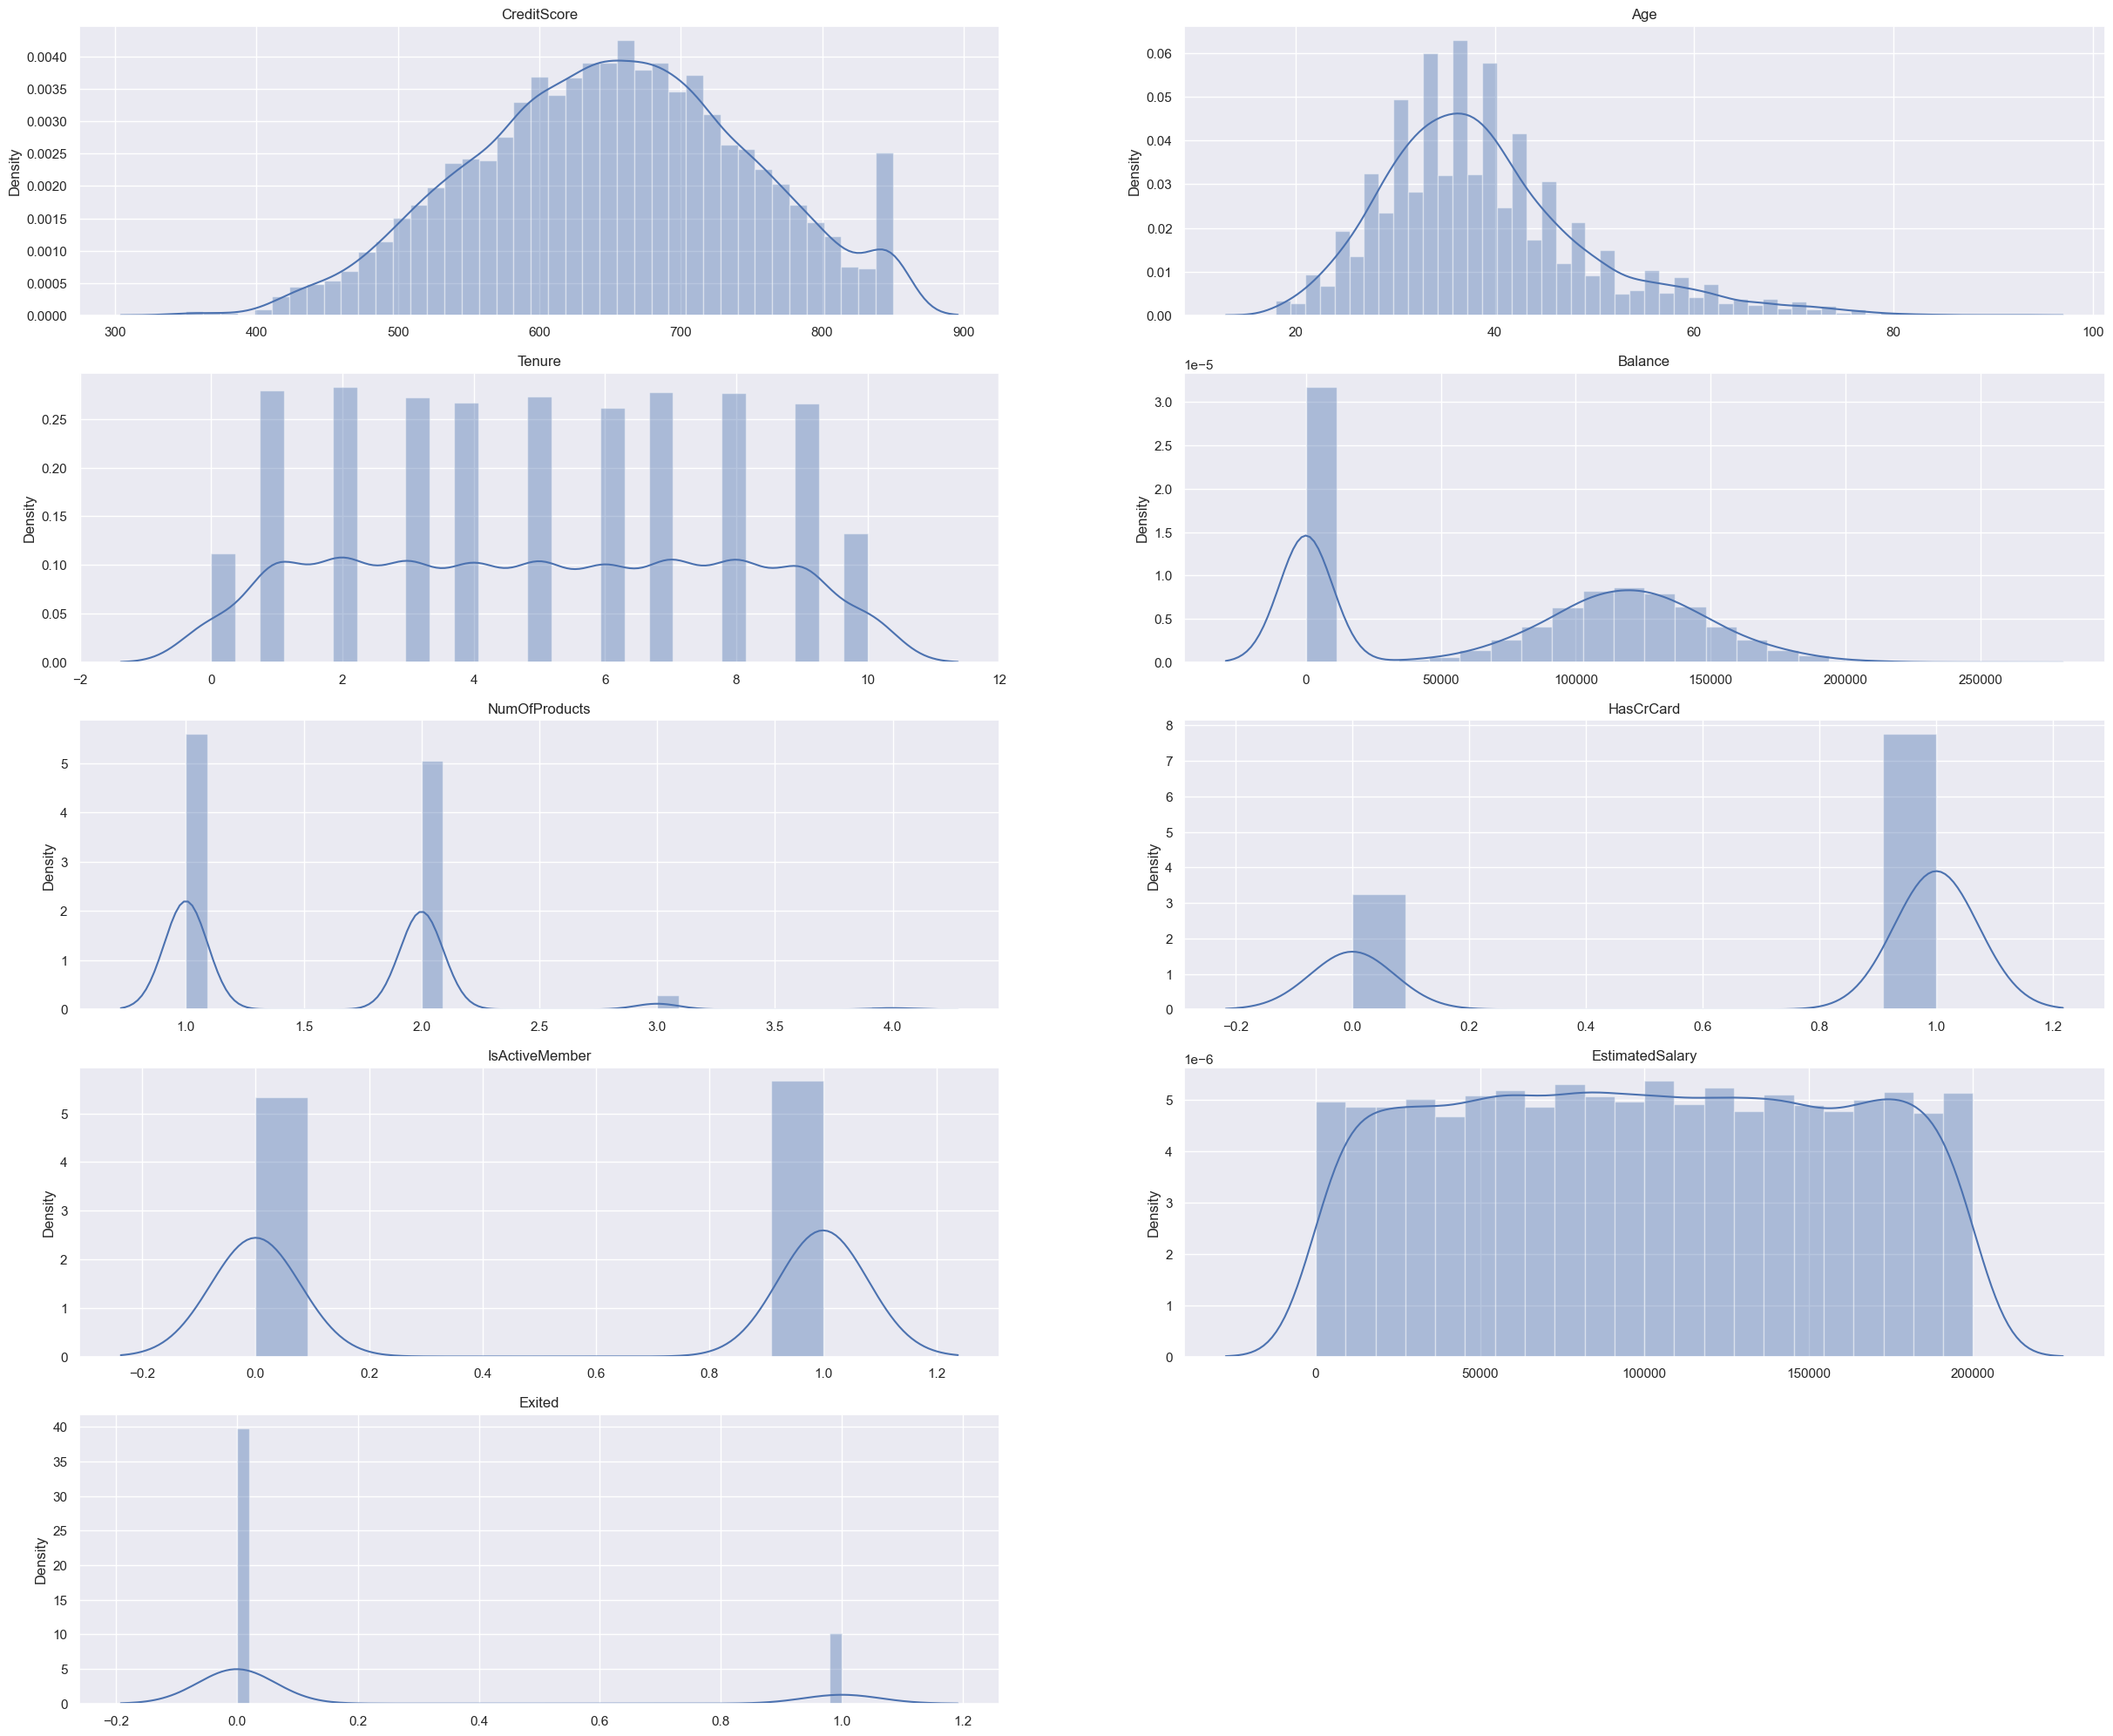

In [54]:
# now let's use distplot to see the distribution of features values
plt.figure(figsize=(30,25),dpi=100)
for i in range(len(num_cols)):
    plt.subplot(5,2,i+1)
    plt.title("{}". format(num_cols[i]))
    sns.distplot(df[num_cols[i]], axlabel=False)

In [55]:
cols_T = [
   'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

In [56]:
transormed_data_1 = df.copy()

# columns to transform 

for atr in cols_T:
    df['log_'+atr]= (df[atr]+1).apply(np.log)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RowNumber            10000 non-null  int64  
 1   CustomerId           10000 non-null  int64  
 2   Surname              10000 non-null  object 
 3   CreditScore          10000 non-null  int64  
 4   Geography            10000 non-null  object 
 5   Gender               10000 non-null  object 
 6   Age                  10000 non-null  int64  
 7   Tenure               10000 non-null  int64  
 8   Balance              10000 non-null  float64
 9   NumOfProducts        10000 non-null  int64  
 10  HasCrCard            10000 non-null  int64  
 11  IsActiveMember       10000 non-null  int64  
 12  EstimatedSalary      10000 non-null  float64
 13  Exited               10000 non-null  int64  
 14  log_CreditScore      10000 non-null  float64
 15  log_Age              10000 non-null  

In [58]:
trans_colums = [
    'log_CreditScore', 'log_Age', 'log_Tenure', 'log_Balance', 'log_NumOfProducts', 'log_HasCrCard', 'log_IsActiveMember', 'log_EstimatedSalary'
]

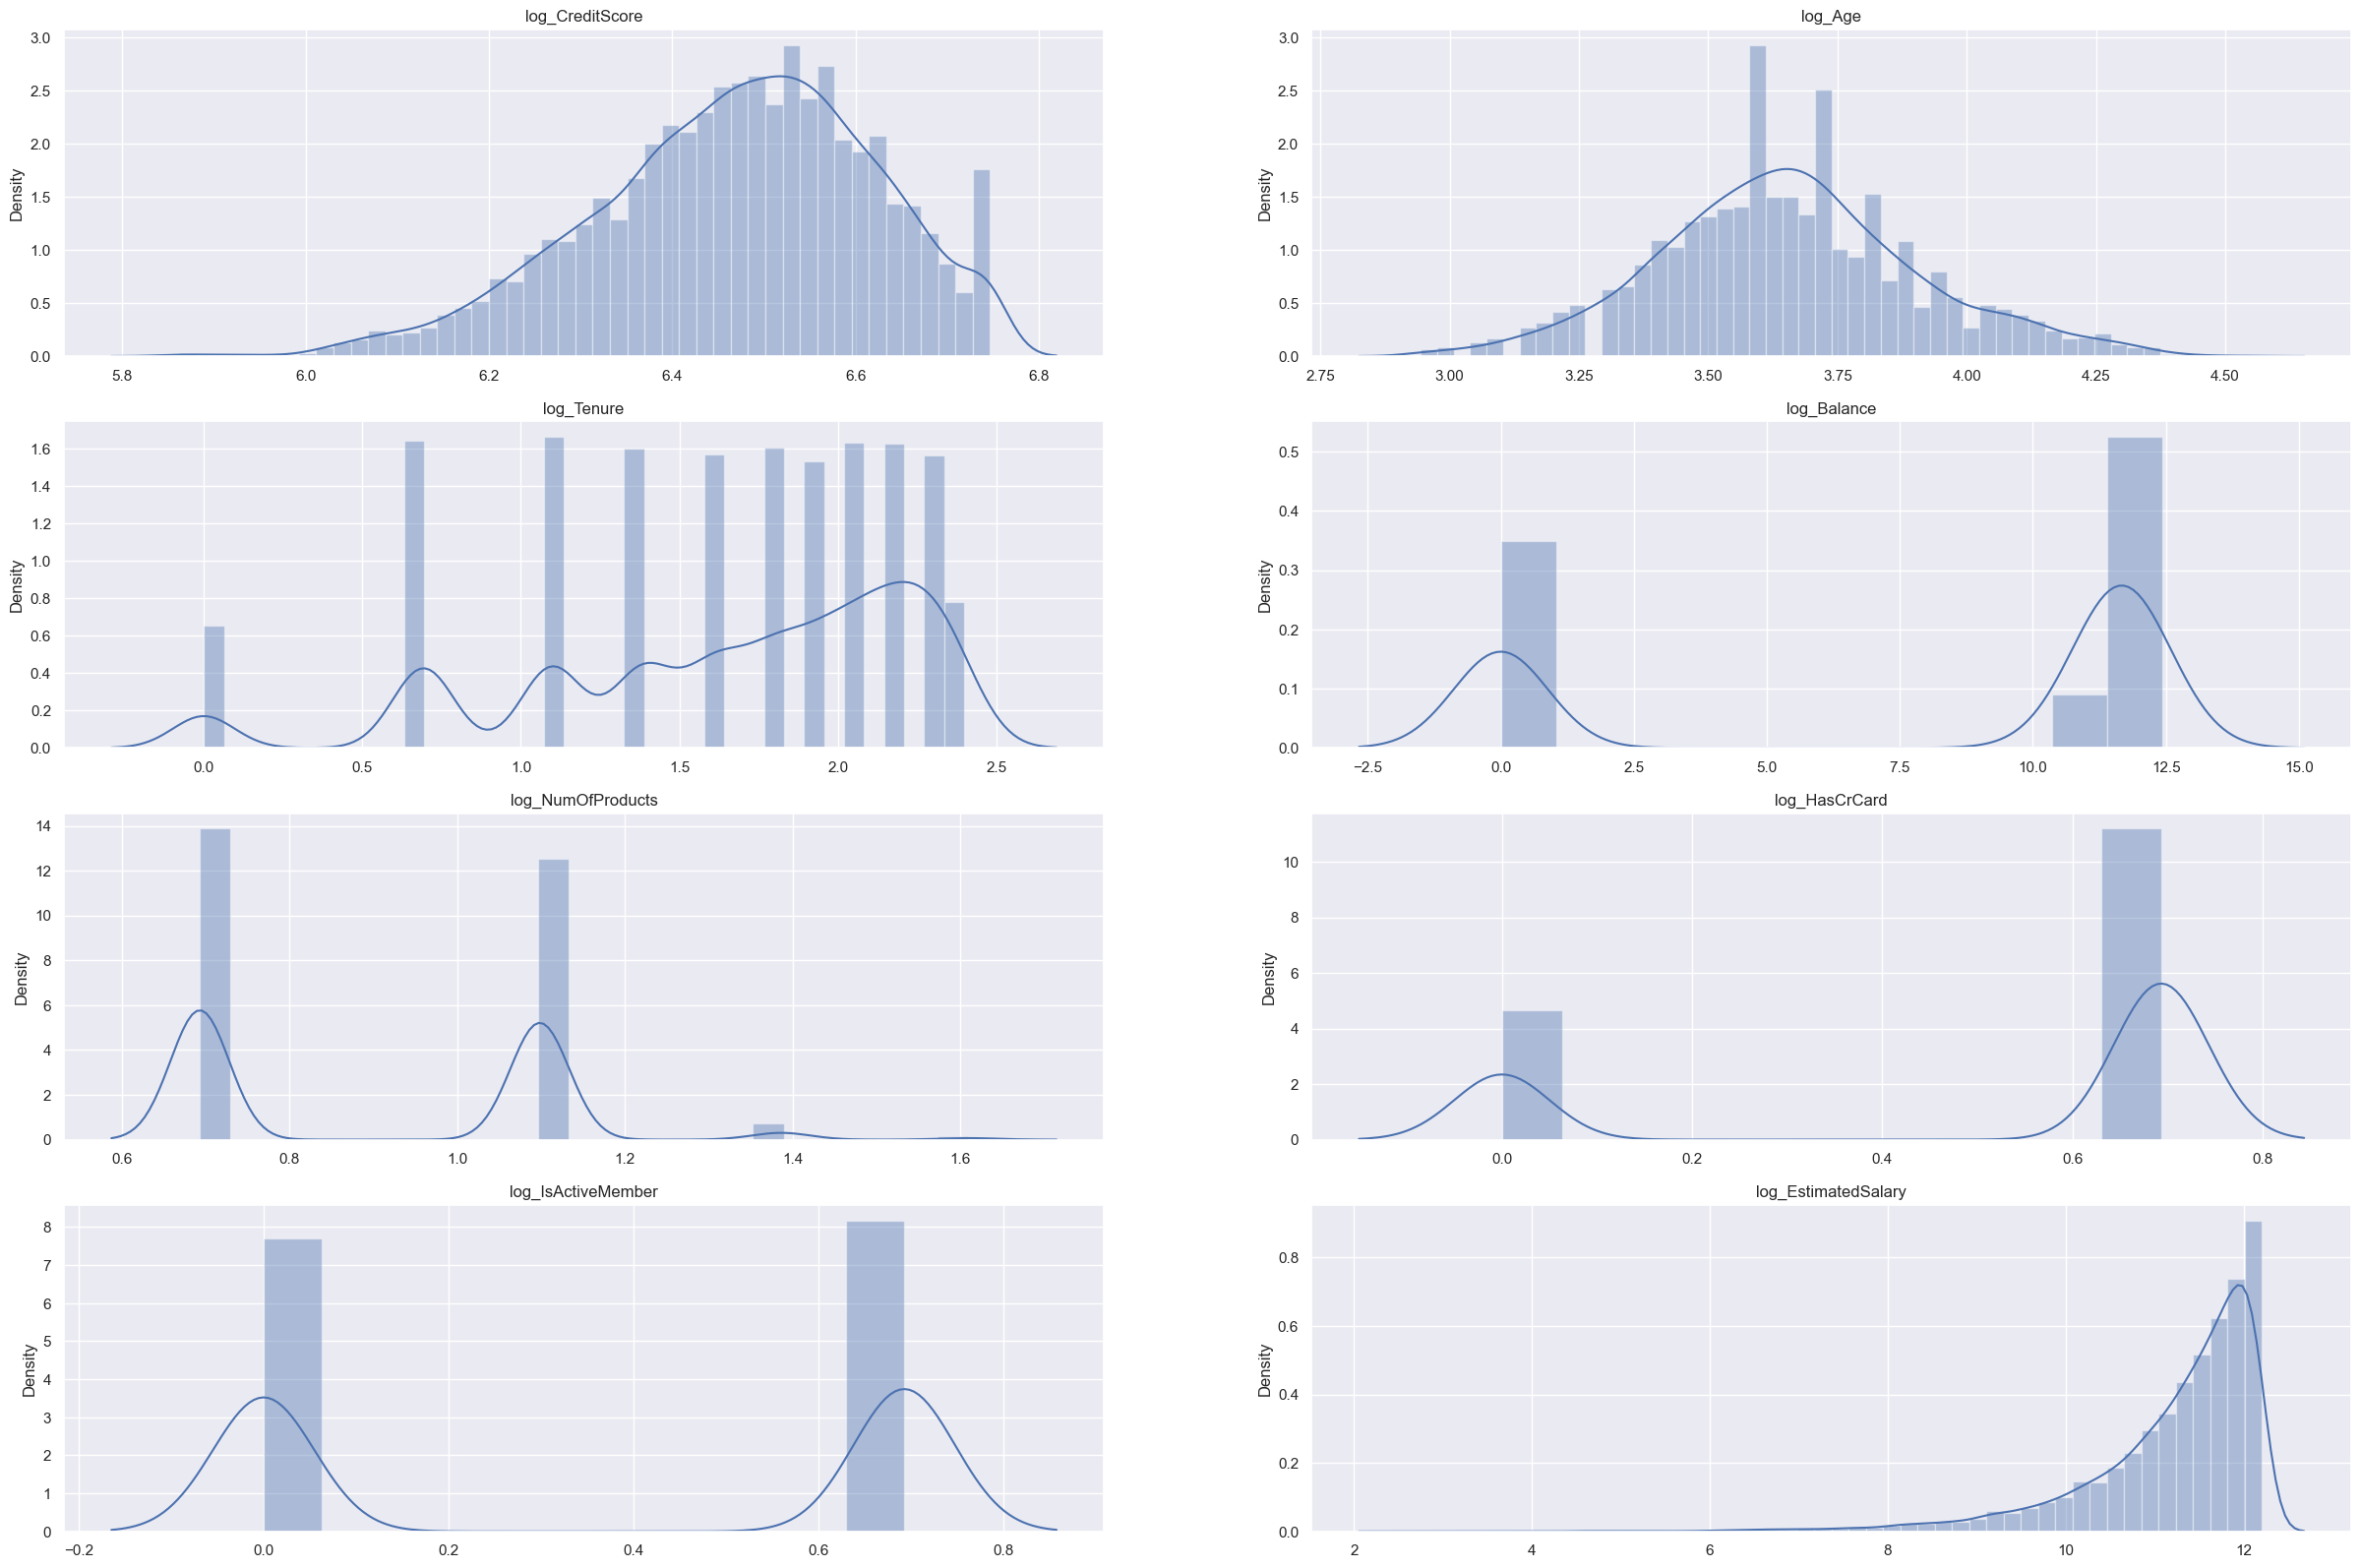

In [59]:
# now let's use distplot to see the distribution of features values
plt.figure(figsize=(30,25),dpi=100)
for i in range(len(trans_colums)):
    plt.subplot(5,2,i+1)
    plt.title("{}". format(trans_colums[i]))
    sns.distplot(df[trans_colums[i]], axlabel=False)

### One Hot Encoding
We are utilizing one-hot encoding to transform the categorical columns "Geography" and "Gender" into numerical representations. By transforming these variables into binary values, this transformation enables us to incorporate them into our analysis and prediction models. We may successfully use the data in these columns for additional analysis and modeling by encoding them.

In [60]:
cat_var = df3.dtypes[df.dtypes== object].index.tolist()
cat_var

['Geography', 'Gender']

In [61]:
# one hot encoding of the columns
ohe = pd.get_dummies(df3[cat_var],dtype=int)

# Concatenate the one-hot encoded columns to the original dataframe
df_enc = pd.concat([df3, ohe], axis=1)

# Drop original categorical columns
df_enc.drop(cat_var, axis=1, inplace=True)

In [62]:
df_enc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Normalization¶
The numerical values are being normalized to standardize their scales and put them within a consistent range. All numerical characteristics will be handled identically throughout analysis and modeling thanks to this normalizing technique. By normalizing the data, we can eliminate any bias or distortion brought on by different scales, enhancing the precision and dependability of our findings.

In [63]:
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_enc[continuous_columns] = scaler.fit_transform(df_enc[continuous_columns])

df_enc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.502155,0.558140,0.2,0.000000,0.0,1,1,0.506735,1,1,0,0,1,0
1,0.478448,0.534884,0.1,0.334031,0.0,0,1,0.562709,0,0,0,1,1,0
2,0.250000,0.558140,0.8,0.636357,1.0,1,0,0.569654,1,1,0,0,1,0
3,0.674569,0.488372,0.1,0.000000,0.5,0,0,0.469120,0,1,0,0,1,0
4,1.000000,0.581395,0.2,0.500246,0.0,1,1,0.395400,0,0,0,1,1,0


In [65]:
path = "/Internship/Task 1. Bank Customer Churn Prediction/project Bank Customer Churn Prediction/data/Churn_prediction_data.csv"

In [66]:
df_enc.to_csv(path)